# MNIST Fashion Image Classification

This notebook implements a DNN to classify images of clothes
in the MNIST dataset

The data contains images of 10 different types of clothes. Each image
is 28x28 pixels. 


In [1]:
import numpy as np
import seaborn as sn
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data directly from Tensorflow. It is already
# separated into a train and test set of images
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# Create labels for each class since they are not provided in the dataset
classes = ['t-shirt','pants','pullover','dress','coat',
           'sandal','shirt','sneaker','bag','boot']

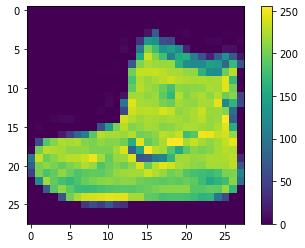

In [4]:
# Plot a single image to see what it looks like
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [5]:
# Find maximum value of color bar to see range of values
# So the range of pixel values is 0-255
print(train_images[0].max())

255


In [6]:
# Normalize the images 
train_images = train_images/255.0
test_images = test_images/255.0

## Build the model

In [7]:
# The first layer of the model will flatten the image into a single array
# of 28*28=784 pixels. The next layer will be a layer of 129 neurons 
# and the last layer is the output layer which will return a probability
# that an image belongs to each of the 10 classes

model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dropout(0.33),
                             tf.keras.layers.Dense(128,activation='relu'),
                             tf.keras.layers.Dropout(0.33),
                             tf.keras.layers.Dense(10)])

In [8]:
# Compile the model with loss function and optimizer
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(train_images, train_labels,
                    verbose=0,epochs=50,validation_split=0.2)

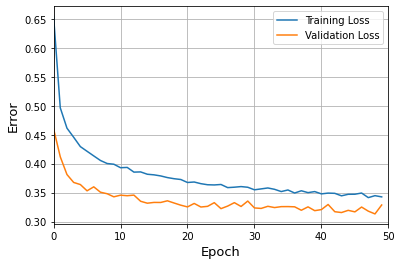

In [10]:
# plotting function to plot losses
def plot_loss(history,epochs):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch',fontsize=13)
    plt.ylabel('Error',fontsize=13)
    plt.xlim(0,epochs)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(history,50)

The validation loss is lower than our training loss which can happen
when the validation set is too easy, or our model is overly regularized.

See here for more information on validation loss being lower than training loss: https://www.pyimagesearch.com/2019/10/14/why-is-my-validation-loss-lower-than-my-training-loss/

In [11]:
# Time to evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=0)

print('\nAccuracy on Test Data: %.3f' % test_acc)


Accuracy on Test Data: 0.874


We see that our model has around 88% accuracy which is lower than the
accuracy on the training dataset. This is a sign that our model is overfitting

## Making Predictions 

In [12]:
# Use model to make predictions. The model will output
# logits (non-normalized predictions) so we use a softmax layer to convert
# to traditional probabilities.
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [13]:
# Get predictions for each test image and plot confusion matrix
max_preds = np.argmax(predictions,axis=1)
confusion = tf.math.confusion_matrix(test_labels,max_preds,num_classes=10)

# Import normalize from sklearn to easily row normalize 
# the confusion matrix for easier interpretation
from sklearn.preprocessing import normalize
normed = normalize(confusion,axis=1,norm='l1')
normed*=100

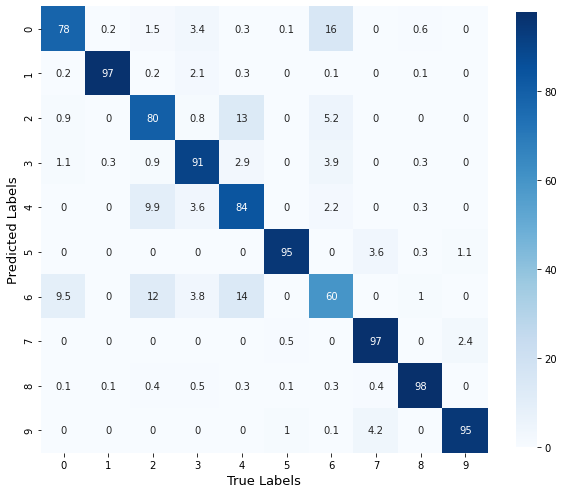

In [14]:
# plot confusion matrix. Display each grid value as a percentage accuracy 
plt.figure(figsize=(10,10))
sn.heatmap(normed,cmap='Blues',annot=True,
           square='True',cbar_kws={"shrink": 0.8})
plt.xlabel('True Labels',fontsize=13)
plt.ylabel('Predicted Labels',fontsize=13)
plt.show()